# GCE Lab 2 - Solar Composition - Stellar Yields and Isotopes

In this notebook, you will analyze the contributions of three enrichment sources on the isotopic composition of the Sun:
* Massive stars ( > 8-10 M$_\odot$) - Stellar winds and core-collapse explosions,
* Low-mass asymptotic-giant-branch (AGB) stars ( < 8-10 M$_\odot$),
* Type Ia supernovae (SNe Ia) - Exploding white dwarfs, which are the remnant of low-mass stars.

You will be able to change the stellar yields for AGB and massive stars.
* **Option 1**
    * AGB and massive stars: [Ritter et al. (2018, NuGrid)](https://ui.adsabs.harvard.edu/abs/2018MNRAS.480..538R/abstract)
    
    
* **Option 2**
    * AGB stars: [Cristallo et al. (2015)](https://ui.adsabs.harvard.edu/abs/2015ApJS..219...40C/abstract)
    * Massive stars: [Limongi & Chieffi (2018)](https://ui.adsabs.harvard.edu/abs/2018ApJS..237...13L/abstract), mix of rotation velocities
    
    
* **Option 3**
    * AGB stars: [Cristallo et al. (2015)](https://ui.adsabs.harvard.edu/abs/2015ApJS..219...40C/abstract)
    * Massive stars: [Nomoto et al. (2013)](https://ui.adsabs.harvard.edu/abs/2013ARA%26A..51..457N/abstract)


* All SN Ia yields are from [Iwamoto et al. (1999)](https://ui.adsabs.harvard.edu/abs/1999ApJS..125..439I/abstract)

In [1]:
# Import the standard Python packages
import copy
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Two-zone galactic chemical evolution code
import JINAPyCEE.omega_plus as omega_plus

# Run scripts for this notebook
%run script_solar_ab.py
kwargs["ns_merger_on"] = False
kwargs["imf_yields_range"] = [1.0, 40.0]

# Matplotlib option
%matplotlib inline

## Run GCE code

In [2]:
# \\\\\\\\\\ Modify below \\\\\\\\\\\\
# ====================================

# Choose one yield option (uncomment one "kwargs["table"]" line)

# NuGrid (Ritter et al. 2018) for both AGB and massive stars
kwargs["table"] = "yield_tables/agb_and_massive_stars_nugrid_MESAonly_fryer12delay.txt"

# Cristallo et al. (2015) for AGB stars
# Limongi & Chieffi (2018) for massive stars
#kwargs["table"] = "yield_tables/agb_and_massive_stars_C15_LC18_R_mix.txt"

# Cristallo et al. (2015) for AGB stars
# Nomoto et al. (2013) for massive stars
#kwargs["table"] = "yield_tables/agb_and_massive_stars_C15_N13_0_5_HNe.txt"

# ====================================
# ////////// Modify above ////////////

# Run the GCE code OMEGA+
print("Using", kwargs["table"])
op = omega_plus.omega_plus(**kwargs)

# Get the timestep where the metallicity is close to Solar
if kwargs["table"] == "yield_tables/agb_and_massive_stars_nugrid_MESAonly_fryer12delay.txt":
    ii_Sun = i_t_Sun + 5
else:
    ii_Sun = copy.deepcopy(i_t_Sun)

Using yield_tables/agb_and_massive_stars_nugrid_MESAonly_fryer12delay.txt
OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 2.01s
   OMEGA+ run completed - Run time: 2.57s


## Plot the Isotopic Contributions

The plot below is normalized to the Solar composition of [Asplund et al. (2009)](https://ui.adsabs.harvard.edu/abs/2009ARA%26A..47..481A/abstract). If the numerical predictions are above 1.0, they overestimate the abundance derived for the Sun. If they are lower, they underestimate.

Text(0, 0.5, 'X / X$_\\odot$')

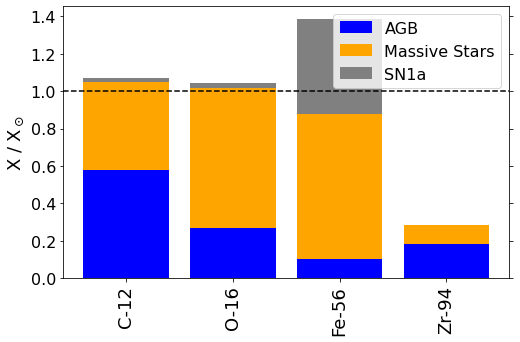

In [3]:
# \\\\\\\\\\ Modify below \\\\\\\\\\\\
# ====================================

# Select the isotopes you want to analyze
# It can also be a mix of isotopes and elements
# Example 1: species = ["C-12", "O-16", Fe-56"]
# Example 2: species = ["C-12", "C-13", "C", "Si-28"]
species = ["C-12", "O-16", "Fe-56", "Zr-94"]

# ====================================
# ////////// Modify above ////////////

# Set the figure size
fig = plt.figure(figsize=(8,5.0))
matplotlib.rcParams.update({'font.size': 16.0})

# Plot contributions
op.inner.mass_frac_plot(species=species, cycle=ii_Sun, yscale="linear")

# Increase size labels
plt.title("")
ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18)
plt.ylabel("X / X$_\odot$", fontsize=18)

* If predictions **reach 1** on the y axis, you reproduced the Solar abundance for that isotope or element.
* If predictions are **above 1** on the y axis, you synthesized too much.
* If predictions are **below 1** on the y axis, you did not synthesize enough.

## Exercise

* Explore different isotopes and look at the impact of using different yields tables. Stellar yields are a fundamental source of uncertainties in chemical evolution studies.